In [37]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h3> This will look at 3 Questions about US Gun Data based on the two datasets provided </h3>


The three questions are:  

Question 1) What is the overall trend of gun purchases?

Question 2) What census data is most associated with high gun per capita?

Question 3) Which states have had the highest growth in guns? 

The following below contain links to each questions section of code, and the answers contain the answer/analysis to the questions I've asked. And finally there is a conclusion linked at the bottom summing up my analysis and the limitations.

[Research Question 1](#RQ1)


[Research Question 2](#RQ2)


[Research Question 3](#RQ3)


[Research Answer 1](#RA1)


[Research Answer 2](#RA2)


[Research Answer 3](#RA3)


[Conclusion](#Conclusion)




<h3>First of all I will examine the data and clean it </h3>

In [38]:
#Reading the orignal data and saving it to a variable called us_census
us_census = pd.read_csv(r"C:\Users\chris\Downloads\u.s.-census-data.csv")

#Reading the orignal data and saving it to a variable called gun_data

gun_data = pd.read_csv(r"gun-data.csv")


In [39]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [40]:
gun_data.isnull().values.any()

True

In [41]:
#code edited from https://datatofish.com/check-nan-pandas-dataframe/

#Viewing how many Null values are in each column because these will affect our analysis
gun_data_null = gun_data.isnull().sum()
print(gun_data_null)

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


In [42]:
#Dropping columns with too many null values in as they will bais our data if using as a column

gun_data = gun_data.drop(['permit_recheck', 'other', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 
                          'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'returned_handgun', 
                         'returned_long_gun', 'returned_long_gun', 'private_sale_handgun', 'private_sale_long_gun',
                         'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun',
                         'return_to_seller_other'], axis = 1)

gun_data

,month,state,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,317,0.0,0.0,0.0,0.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,160,0.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,631,0.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,366,51.0,0.0,0.0,0.0,17747
4,2017-09,California,57839.0,37165.0,24581.0,0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,14.0,2.0,8,0.0,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,65.0,286.0,8,1.0,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,149.0,251.0,5,0.0,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,25.0,214.0,2,0.0,NaN,NaN,NaN,241


In [43]:
#order the rows first by 'state' and then the 'month' columns

gun_data.sort_values(by=['state', 'month'])

,month,state,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
12430,1998-11,Alabama,0.0,449.0,603.0,10,0.0,NaN,NaN,NaN,1062
12375,1998-12,Alabama,0.0,10118.0,25120.0,268,0.0,NaN,NaN,NaN,35506
12320,1999-01,Alabama,0.0,7516.0,10311.0,222,0.0,NaN,NaN,NaN,18049
12265,1999-02,Alabama,0.0,9630.0,10654.0,299,0.0,NaN,NaN,NaN,20583
12210,1999-03,Alabama,0.0,9151.0,9991.0,282,0.0,NaN,NaN,NaN,19424
...,...,...,...,...,...,...,...,...,...,...,...
274,2017-05,Wyoming,435.0,1589.0,1578.0,91,5.0,0.0,0.0,0.0,4128
219,2017-06,Wyoming,350.0,1520.0,1544.0,85,0.0,0.0,0.0,0.0,3975
164,2017-07,Wyoming,279.0,1231.0,1395.0,77,11.0,0.0,0.0,0.0,3398
109,2017-08,Wyoming,408.0,1411.0,1762.0,86,2.0,0.0,0.0,0.0,4111


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF136E1430>,
      dtype=object)

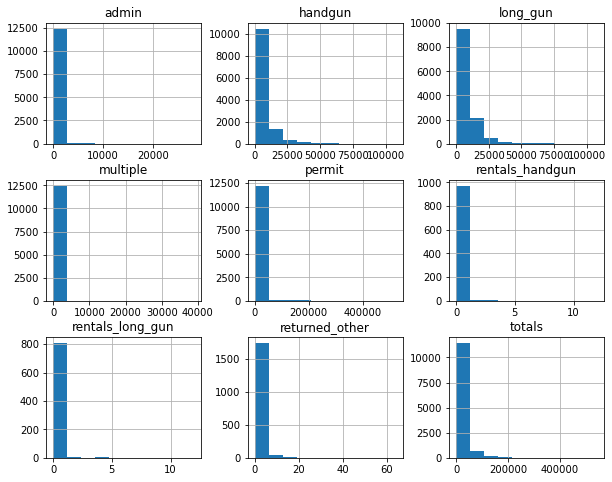

In [44]:
#exploring the distributions of the columns

gun_data.hist(figsize=(10,8))

<a id="RQ1"></a>


<h1>Research Question 1) What is the overall trend of gun purchases?</h1>


For this I need the month for the x-axis and the total number of gun purchases for y axis

In [45]:
#Firstly I will sort the values by date for the x-axis

''' 
I used https://stackoverflow.com/questions/28161356/sort-pandas-dataframe-by-date/49702492 for help with the code.
This uses the .sort_values method that will sort columns in ascending order(default) on the dataframe gun_data.
The 'by' parameter is the column to be sorted which in this case is specified as 'month'. 
The result is the variable gun_data is now updated with this action.
'''
#This now sorts in date order on the month column
gun_data = gun_data.sort_values(by='month') 
        

In [46]:
#Now to 'group by' the average value for each month, working out the mean using the .mean() method
gun_data_gb = gun_data.groupby(['month']).mean()


In [47]:
#We can see the 'total' columns gives us the average for each month - but 'month' is now the index column

gun_data_gb

,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
month,,,,,,,,,
1998-11,37.690909,124.709091,216.527273,5.000000,1.090909,NaN,NaN,NaN,385.018182
1998-12,1409.185185,3947.037037,10571.888889,153.545455,39.981481,NaN,NaN,NaN,15831.309091
1999-01,1427.259259,3416.592593,5739.166667,136.327273,129.500000,NaN,NaN,NaN,10654.072727
1999-02,1569.611111,4304.592593,6526.129630,167.745455,210.574074,NaN,NaN,NaN,12549.363636
1999-03,1910.833333,4463.629630,6977.314815,173.400000,206.555556,NaN,NaN,NaN,13485.218182
...,...,...,...,...,...,...,...,...,...
2017-05,15108.418182,10036.690909,5966.490909,308.527273,10.981818,1.636364,0.090909,0.018182,34524.363636
2017-06,14557.363636,10348.163636,6020.945455,310.472727,9.309091,1.272727,0.018182,0.072727,34332.109091
2017-07,13725.818182,8729.527273,5859.345455,285.836364,15.727273,1.327273,0.090909,0.036364,31514.690909


In [48]:
#This adds a new column for the index. Inplace = True means it changes the original dataframe, not just the output of the cell
gun_data_gb.reset_index(inplace=True)


In [49]:
gun_data_gb.dtypes

month                object
permit              float64
handgun             float64
long_gun            float64
multiple            float64
admin               float64
returned_other      float64
rentals_handgun     float64
rentals_long_gun    float64
totals              float64
dtype: object

In [50]:
gun_data_gb['month'] = pd.to_datetime(gun_data_gb['month'])

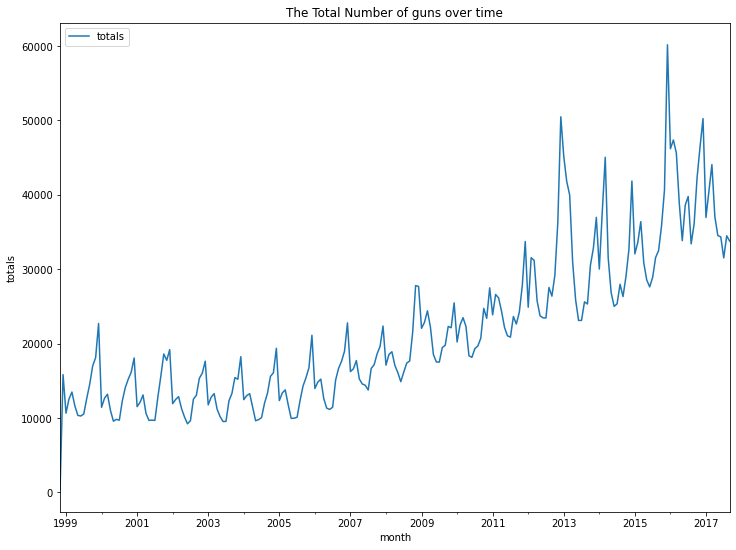

In [51]:
#Plotting the graph

gun_data_gb.plot(x ='month', y='totals', kind = 'line', figsize=(12,9))
# Code found on/edited from https://www.datacamp.com/community/tutorials/moving-averages-in-pandas


plt.xlabel('month')
# Set the y axis label of the current axis.
plt.ylabel('totals')
#Set title
plt.title('The Total Number of guns over time')

plt.legend()

In [52]:
#We can see the graph above is hard to read due to big fluctuations - looking like a seasonal trend

#Create a 12 Month Moving Average to try and make the trend easier to see by reducing flucatuation 

gun_data_gb['12_Month_Moving_Average'] = gun_data_gb.iloc[:,9].rolling(window=12).mean()


'''For this code I code inspiration from the article on https://www.datacamp.com/community/tutorials/moving-averages-in-pandas.

To show I understand this, the ‘gun_data_gb['12_Month_Moving_Average']’ creates a column in the gun_data_gb dataframe that
is equal to the gun_data_gb, with all rows represented by the first parameter ‘:’, and the column with index ‘9’ represented 
by the second parameter.

Then the ‘.rolling’ method is a built in function that creates a cumulative addition of previous numbers, with the 
parameter ‘window=12’ being passed which states how many previous rows should be added.

And finally the .mean() method is a built in function to calculate the mean of this 
‘window’ which will give us the 12-month moving average.
'''

"For this code I code inspiration from the article on https://www.datacamp.com/community/tutorials/moving-averages-in-pandas.\n\nTo show I understand this, the ‘gun_data_gb['12_Month_Moving_Average']’ creates a column in the gun_data_gb dataframe that\nis equal to the gun_data_gb, with all rows represented by the first parameter ‘:’, and the column with index ‘9’ represented \nby the second parameter.\n\nThen the ‘.rolling’ method is a built in function that creates a cumulative addition of previous numbers, with the \nparameter ‘window=12’ being passed which states how many previous rows should be added.\n\nAnd finally the .mean() method is a built in function to calculate the mean of this \n‘window’ which will give us the 12-month moving average.\n"

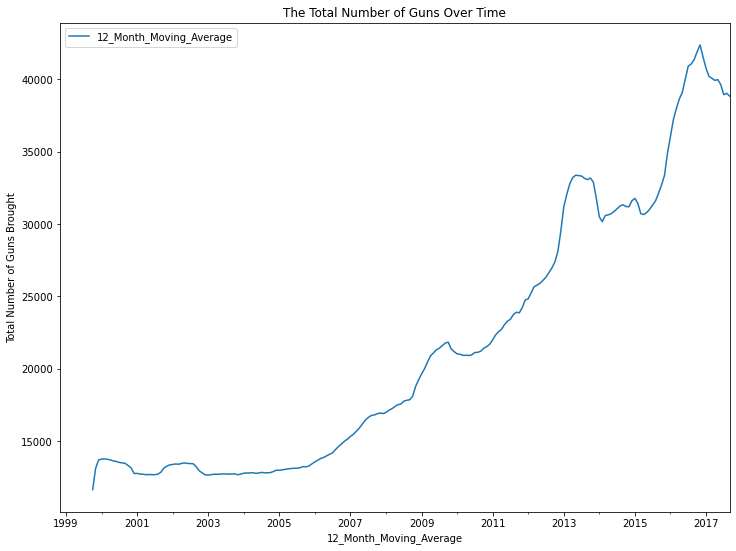

In [53]:
#Showing the 12 month rolling aveage is much better

gun_data_gb.plot(x ='month', y='12_Month_Moving_Average', kind = 'line', figsize=(12,9))
#https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

plt.xlabel('12_Month_Moving_Average')
# Set the y axis label of the current axis.
plt.ylabel('Total Number of Guns Brought')
#Set title
plt.title('The Total Number of Guns Over Time')
plt.legend()

<a id="RA1"></a>


<h1>Research Question 1) Answer: What is the overall trend of gun purchases? </h1>




We can see from this graph that the general trend of gun ownership is increasing over time from 1999 to 2017 in the U.S.A. 
We can also see this is also increasing more rapidly/exponentially over time, with a steeper line from 2007-2017 than the
previous decade.


However a limitation is that this potentially does not show all types of gun. And it also show the absolute values rather than
as a percentage of the general population so, gun ownerhsip per person may be declining or staying the same (or at least not
be as steeply increasing) if the population has been increasing rapidly.


<h1>Research Question 2) What census data is most associated with high gun per capita? </h1>

<h3>For this question, firstly I am going to explore the census data</h3>

In [56]:
us_census = pd.read_csv(r"C:\Users\chris\Downloads\u.s.-census-data.csv")


#Looking at the data types of each column
us_census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


<h3>We can see that the columns for each state are not numerical - but they need to be numerical
to use numerical functions or any statistical analysis so I will convert them here</h3>

In [57]:
#print out a list of the columns to put into the code below
print(list(us_census.columns))
    


['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [58]:
'''
Create a new dataframe with the states in only, to replace all non-numerical characters in these columns ready for
data analysis
'''

us_census_states = us_census[[ 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 
    'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
    'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']] 

In [59]:
'''
This line of code which gets rid off non-numeric values in the columns(by replacing them with nothing) was adapted from 
https://stackoverflow.com/questions/55299583/pandas-removing-all-special-characters-from-columns. Where I have called the 
dataframe variable, and used the .replace method which replaces the first paramter which the first paramter is what is to be
replaced (in this case \D+ returns the rows with no non-digital value)

'''

us_census_states = us_census_states.replace(r'\D+', '', regex=True)

In [60]:
'''
Use the .apply() method with parameters pd.to_numeric() to turn the columns numeric to perform mathematical functions on
Erros = 'coerce' turns values it doesn't think it should covnert/can't parse for whatever reason into a null value, 
which although isn't ideal, it stops the code from breaking when this happens.
'''


us_census_states = us_census_states.apply(pd.to_numeric, errors='coerce')

In [62]:
#now I have a table with the converted numerical values
us_census_states

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,10310371.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,9688680.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,640.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,9687653.0,...,814180.0,6346105.0,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,640.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#This needs to be merged back with the 'Fact' Column to make sense of the data

In [66]:
#Create a series with just the Fact row as that's all that's needed from the first dataframe to merge with the numeric dataframe

#Reading the orignal data again so isn't numeric and saving it to a variable called us_census
us_census = pd.read_csv(r"C:\Users\chris\Downloads\u.s.-census-data.csv")

us_census_fact = us_census['Fact']
us_census_fact

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
                            ...                        
80                                                   FN
81                                                  NaN
82                                                    S
83                                                    X
84                                                    Z
Name: Fact, Length: 85, dtype: object

In [67]:
#now the new dataframe is complete

new_df = pd.concat([us_census_fact, us_census_states], axis=1)
new_df



,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.0,6346105.0,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#Need to change the name 'Fact' to 'State' to be able to merge with the other table easier (with a column of the same name)
#Code found on https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

new_df_1 = new_df.rename({'Fact': 'State'}, axis=1)
new_df_1.head()

,State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.0,6346105.0,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0


<h4>Now we can perform mathematical functions on them</h4>


<a id="RQ2"></a>


<h1>Research Question 2: What census data is most associated with high gun per capita? </h1>




In [69]:
'''
First I need to transpose the state columns to rows instead, and then connect them to the other table to make a 
comparison easier
'''

'\nFirst I need to transpose the state columns to rows instead, and then connect them to the other table to make a \ncomparison easier\n'

In [70]:
#First I am transposing them 
us_census_df = new_df_1.transpose()
us_census_df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,5.54054e+06,5.02932e+06,1020,5.0292e+06,610,680,2280,2440,1340,1090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,3.57645e+06,3.57411e+06,10,3.5741e+06,520,570,2110,2290,1610,1420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,952065,897936,600,897934,580,620,2150,2290,1750,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,2.06124e+07,1.88046e+07,960,1.88013e+07,550,570,2010,2130,1990,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
##https://www.codegrepper.com/code-examples/python/make+first+row+column+names+in+pandas

us_census_df.rename(columns=us_census_df.iloc[0])
us_census_df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,5.54054e+06,5.02932e+06,1020,5.0292e+06,610,680,2280,2440,1340,1090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,3.57645e+06,3.57411e+06,10,3.5741e+06,520,570,2110,2290,1610,1420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,952065,897936,600,897934,580,620,2150,2290,1750,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,2.06124e+07,1.88046e+07,960,1.88013e+07,550,570,2010,2130,1990,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Then I need to make the top heading the actual column headings

#Code taken from https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row

us_census_df.columns = us_census_df.iloc[0]
us_census_df = us_census_df[1:]
us_census_df

State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,5.54054e+06,5.02932e+06,1020,5.0292e+06,610,680,2280,2440,1340,1090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,3.57645e+06,3.57411e+06,10,3.5741e+06,520,570,2110,2290,1610,1420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,952065,897936,600,897934,580,620,2150,2290,1750,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,2.06124e+07,1.88046e+07,960,1.88013e+07,550,570,2010,2130,1990,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,1.03104e+07,9.68868e+06,640,9.68765e+06,640,710,2440,2570,1310,1070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> The next step is to either convert this to a new index
or stop below code from turning numerical when it's transposed</h3>

In [74]:
us_census_df

State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,5.54054e+06,5.02932e+06,1020,5.0292e+06,610,680,2280,2440,1340,1090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,3.57645e+06,3.57411e+06,10,3.5741e+06,520,570,2110,2290,1610,1420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,952065,897936,600,897934,580,620,2150,2290,1750,1440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,2.06124e+07,1.88046e+07,960,1.88013e+07,550,570,2010,2130,1990,1730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,1.03104e+07,9.68868e+06,640,9.68765e+06,640,710,2440,2570,1310,1070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#find list of column names here

print(us_census_df.columns)

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

In [76]:
#Now I will drop the columns from FIPS Code onwards which I count as columns indexed 66 to 85

us_census_df = us_census_df.drop(list(us_census_df)[66:85], axis=1)
us_census_df

#Code taken from https://stackoverflow.com/questions/51765983/dropping-multiple-pandas-columns-by-index

State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,374153,203604,137630,92219,272651,41943,316984,944,5.06453e+06,1
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,68032,35402,22141,13688,51147,7953,56091,12,5.70641e+07,2
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,499926,245243,182425,135313,344981,46780,427582,563,1.13594e+07,4
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,231959,123158,75962,35982,189029,25915,192988,56,5.20355e+06,5
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,3.54845e+06,1.85258e+06,1.32008e+06,1.61986e+06,1.81911e+06,252377,3.17634e+06,2391,1.55779e+07,6
Colorado,5.54054e+06,5.02932e+06,1020,5.0292e+06,610,680,2280,2440,1340,1090,...,547352,284554,194508,85849,442365,51722,469524,485,1.03642e+07,8
Connecticut,3.57645e+06,3.57411e+06,10,3.5741e+06,520,570,2110,2290,1610,1420,...,326693,187845,106678,56113,259614,31056,281182,7381,484236,9
Delaware,952065,897936,600,897934,580,620,2150,2290,1750,1440,...,73418,38328,23964,14440,54782,7206,60318,4608,194854,10
Florida,2.06124e+07,1.88046e+07,960,1.88013e+07,550,570,2010,2130,1990,1730,...,2.10019e+06,1.08488e+06,807817,926112,1.12175e+06,185756,1.84669e+06,3506,5.36248e+06,12
Georgia,1.03104e+07,9.68868e+06,640,9.68765e+06,640,710,2440,2570,1310,1070,...,929864,480578,376506,371588,538893,96787,800585,1684,5.75135e+06,13


In [77]:
us_census_df.head()

State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,374153,203604,137630,92219,272651,41943,316984,944,5.06453e+06,1
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,68032,35402,22141,13688,51147,7953,56091,12,5.70641e+07,2
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,499926,245243,182425,135313,344981,46780,427582,563,1.13594e+07,4
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,231959,123158,75962,35982,189029,25915,192988,56,5.20355e+06,5
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,3.54845e+06,1.85258e+06,1.32008e+06,1.61986e+06,1.81911e+06,252377,3.17634e+06,2391,1.55779e+07,6


<h3> The next steps are to merge with the other gun-data table to find correlations between them </h3>

In [78]:
#Need to change the name 'state' to 'State' to be able to merge with the other table as capitals count here
#https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

gun_data_1 = gun_data.rename({'state': 'State'}, axis=1)
gun_data_1.head()

,month,State,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
12484,1998-11,Wyoming,8.0,45.0,49.0,5,0.0,NaN,NaN,NaN,107
12453,1998-11,Massachusetts,0.0,4.0,39.0,0,0.0,NaN,NaN,NaN,43
12452,1998-11,Maryland,59.0,82.0,177.0,0,0.0,NaN,NaN,NaN,318
12451,1998-11,Mariana Islands,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0
12450,1998-11,Maine,0.0,54.0,41.0,5,0.0,NaN,NaN,NaN,100


In [79]:
#make a new table grouping by the State so we can join on this later

gun_data_gb_state = gun_data.groupby(['state']).mean()
gun_data_gb_state

,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
state,,,,,,,,,
Alabama,4614.277533,9788.709251,11568.409692,463.568282,0.140969,0.000000,0.055556,0.000000,29542.198238
Alaska,58.819383,1914.546256,2520.590308,127.330396,0.083700,0.424242,0.000000,0.000000,5011.643172
Arizona,3129.995595,7847.876652,6523.180617,374.356828,29.264317,0.090909,0.000000,0.000000,19496.537445
Arkansas,2237.669604,4253.674009,7327.118943,272.770925,9.453744,0.000000,0.000000,0.000000,16531.422907
California,28768.911894,26039.118943,26153.171806,915.700441,73.480176,0.000000,0.000000,0.000000,83762.392070
Colorado,1880.925110,11138.422907,12008.955947,1351.854626,12.889381,0.636364,0.000000,0.000000,26689.348018
Connecticut,7027.621145,3873.392070,2810.995595,35.348018,127.876652,0.000000,0.000000,0.000000,13956.502203
Delaware,100.088106,916.779736,1067.114537,36.427313,0.185022,0.000000,0.000000,0.000000,2164.621145
District of Columbia,1.453744,20.132159,2.665198,0.176211,0.237885,0.000000,0.000000,0.000000,24.674009


In [80]:
#Join the new tables

df = pd.concat([us_census_df, gun_data_gb_state], axis=1)
df

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,FIPS Code,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
Alabama,4.8633e+06,4.78013e+06,170,4.77974e+06,600,640,2260,2370,1610,1380,...,1,4614.277533,9788.709251,11568.409692,463.568282,0.140969,0.000000,0.055556,0.000000,29542.198238
Alaska,741894,710249,450,710231,730,760,2520,2640,1040,770,...,2,58.819383,1914.546256,2520.590308,127.330396,0.083700,0.424242,0.000000,0.000000,5011.643172
Arizona,6.93107e+06,6.3923e+06,840,6.39202e+06,630,710,2350,2550,1690,1380,...,4,3129.995595,7847.876652,6523.180617,374.356828,29.264317,0.090909,0.000000,0.000000,19496.537445
Arkansas,2.98825e+06,2.91602e+06,250,2.91592e+06,640,680,2360,2440,1630,1440,...,5,2237.669604,4253.674009,7327.118943,272.770925,9.453744,0.000000,0.000000,0.000000,16531.422907
California,3.925e+07,3.72545e+07,540,3.7254e+07,630,680,2320,2500,1360,1140,...,6,28768.911894,26039.118943,26153.171806,915.700441,73.480176,0.000000,0.000000,0.000000,83762.392070
Colorado,5.54054e+06,5.02932e+06,1020,5.0292e+06,610,680,2280,2440,1340,1090,...,8,1880.925110,11138.422907,12008.955947,1351.854626,12.889381,0.636364,0.000000,0.000000,26689.348018
Connecticut,3.57645e+06,3.57411e+06,10,3.5741e+06,520,570,2110,2290,1610,1420,...,9,7027.621145,3873.392070,2810.995595,35.348018,127.876652,0.000000,0.000000,0.000000,13956.502203
Delaware,952065,897936,600,897934,580,620,2150,2290,1750,1440,...,10,100.088106,916.779736,1067.114537,36.427313,0.185022,0.000000,0.000000,0.000000,2164.621145
Florida,2.06124e+07,1.88046e+07,960,1.88013e+07,550,570,2010,2130,1990,1730,...,12,4796.484581,26035.030837,16868.237885,1069.171806,372.726872,0.787879,0.000000,0.000000,51523.246696
Georgia,1.03104e+07,9.68868e+06,640,9.68765e+06,640,710,2440,2570,1310,1070,...,13,7870.960352,9373.466960,10080.995595,389.409692,1819.013216,0.000000,0.000000,0.000000,31761.859031


In [81]:
#need to check the datatypes to see if they're numeric or now
df.dtypes

Population estimates, July 1, 2016,  (V2016)                                              object
Population estimates base, April 1, 2010,  (V2016)                                        object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     object
Population, Census, April 1, 2010                                                         object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    object
                                                                                          ...   
admin                                                                                    float64
returned_other                                                                           float64
rentals_handgun                                                                          float64
rentals_long_gun                                                                         float64
totals                        

In [82]:
#Convert them to Numeric to perform data analysis on
df_table = df.apply(pd.to_numeric)
df_table

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,FIPS Code,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,1380.0,...,1.0,4614.277533,9788.709251,11568.409692,463.568282,0.140969,0.000000,0.055556,0.000000,29542.198238
Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,770.0,...,2.0,58.819383,1914.546256,2520.590308,127.330396,0.083700,0.424242,0.000000,0.000000,5011.643172
Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,1380.0,...,4.0,3129.995595,7847.876652,6523.180617,374.356828,29.264317,0.090909,0.000000,0.000000,19496.537445
Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,1440.0,...,5.0,2237.669604,4253.674009,7327.118943,272.770925,9.453744,0.000000,0.000000,0.000000,16531.422907
California,39250017.0,37254522.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,1140.0,...,6.0,28768.911894,26039.118943,26153.171806,915.700441,73.480176,0.000000,0.000000,0.000000,83762.392070
Colorado,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,2440.0,1340.0,1090.0,...,8.0,1880.925110,11138.422907,12008.955947,1351.854626,12.889381,0.636364,0.000000,0.000000,26689.348018
Connecticut,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,2290.0,1610.0,1420.0,...,9.0,7027.621145,3873.392070,2810.995595,35.348018,127.876652,0.000000,0.000000,0.000000,13956.502203
Delaware,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,2290.0,1750.0,1440.0,...,10.0,100.088106,916.779736,1067.114537,36.427313,0.185022,0.000000,0.000000,0.000000,2164.621145
Florida,20612439.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,2130.0,1990.0,1730.0,...,12.0,4796.484581,26035.030837,16868.237885,1069.171806,372.726872,0.787879,0.000000,0.000000,51523.246696
Georgia,10310371.0,9688680.0,640.0,9687653.0,640.0,710.0,2440.0,2570.0,1310.0,1070.0,...,13.0,7870.960352,9373.466960,10080.995595,389.409692,1819.013216,0.000000,0.000000,0.000000,31761.859031


In [84]:
#Check correlations with .corr() method

gun_corr_matrix = df_table.corr()
gun_corr_matrix

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,FIPS Code,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
"Population estimates, July 1, 2016, (V2016)",1.000000,0.999079,0.226361,0.999078,0.002272,0.005202,0.007665,0.011828,-0.058038,-0.053510,...,-0.097769,0.236169,0.809118,0.743011,0.624743,0.179665,-0.062596,0.317345,0.274655,0.649697
"Population estimates base, April 1, 2010, (V2016)",0.999079,1.000000,0.198523,1.000000,-0.007749,-0.005036,-0.001487,0.002558,-0.064268,-0.059478,...,-0.100028,0.242012,0.797879,0.743465,0.606984,0.173949,-0.067205,0.324154,0.288460,0.649583
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",0.226361,0.198523,1.000000,0.198512,0.589625,0.604609,0.567580,0.566221,0.389437,0.371248,...,-0.205931,-0.024835,0.322149,0.092775,0.428956,0.217658,0.318346,-0.135250,-0.161118,0.118098
"Population, Census, April 1, 2010",0.999078,1.000000,0.198512,1.000000,-0.007755,-0.005042,-0.001494,0.002552,-0.064282,-0.059493,...,-0.100014,0.242016,0.797864,0.743465,0.606973,0.173927,-0.067202,0.324168,0.288475,0.649580
"Persons under 5 years, percent, July 1, 2016, (V2016)",0.002272,-0.007749,0.589625,-0.007755,1.000000,0.994978,0.996376,0.992653,0.879827,0.876411,...,-0.401266,0.135405,0.052367,-0.127745,0.071140,0.122366,0.159831,-0.338345,-0.297109,0.073581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
admin,0.179665,0.173949,0.217658,0.173927,0.122366,0.133433,0.135457,0.137763,0.082882,0.076386,...,-0.208751,0.093716,0.187872,0.096373,0.145520,1.000000,-0.057117,-0.015388,-0.007055,0.163199
returned_other,-0.062596,-0.067205,0.318346,-0.067202,0.159831,0.189430,0.153692,0.149411,-0.051155,-0.053884,...,0.297582,0.030105,0.004794,0.006087,-0.014584,-0.057117,1.000000,-0.055124,-0.043056,0.018107
rentals_handgun,0.317345,0.324154,-0.135250,0.324168,-0.338345,-0.336353,-0.330388,-0.328013,-0.335400,-0.341018,...,0.110627,0.042215,-0.022444,0.178249,-0.007254,-0.015388,-0.055124,1.000000,0.901498,0.089361
rentals_long_gun,0.274655,0.288460,-0.161118,0.288475,-0.297109,-0.313605,-0.299329,-0.296812,-0.286962,-0.291653,...,0.074486,-0.004629,-0.058116,0.089709,-0.087247,-0.007055,-0.043056,0.901498,1.000000,0.008081


In [85]:
#I'm only interested in the correlation with Totals for this so will drop the rest of the rows

In [86]:
totals = gun_corr_matrix[['totals']]     
totals

,totals
"Population estimates, July 1, 2016, (V2016)",0.649697
"Population estimates base, April 1, 2010, (V2016)",0.649583
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",0.118098
"Population, Census, April 1, 2010",0.649580
"Persons under 5 years, percent, July 1, 2016, (V2016)",0.073581
...,...
admin,0.163199
returned_other,0.018107
rentals_handgun,0.089361
rentals_long_gun,0.008081


In [87]:
#Then I sort to see the highest correlated values using the .sort_values() method

#Code taken from https://datatofish.com/sort-pandas-dataframe/

totals.sort_values(by=['totals'], inplace=True, ascending=False)
totals

<ipython-input-87-01ccc232e405>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals.sort_values(by=['totals'], inplace=True, ascending=False)


,totals
totals,1.000000
permit,0.811248
long_gun,0.720044
handgun,0.716186
"Total manufacturers shipments, 2012 ($1,000)",0.684760
...,...
"Per capita income in past 12 months (in 2015 dollars), 2011-2015",-0.190280
"Median household income (in 2015 dollars), 2011-2015",-0.214555
"Mean travel time to work (minutes), workers age 16 years+, 2011-2015",-0.223687
"Total retail sales per capita, 2012",-0.293659


<h3> I'm converting it back to an excel file to view the data from a different way  </h3>

In [88]:
#Explore the dataset in excel
#Code from: https://pythonexamples.org/pandas-write-dataframe-to-excel-sheet/


# create excel writer object
writer = pd.ExcelWriter('merged_table.xlsx')
# write dataframe to excel
df_table.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


<h3>Correlation with Totals is what I am interested in for this question</h3>

In [89]:
#Explore the dataset in excel
#Code from: https://pythonexamples.org/pandas-write-dataframe-to-excel-sheet/


# create excel writer object
writer = pd.ExcelWriter('totals.xlsx')
# write dataframe to excel
totals.to_excel(writer)
# save the excel
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


<a id="RA2"></a>


<h2> Research Answer 2) What census data is most associated with high gun per capita? <h/2>




The highest correlated columns were:



<ol>
<li>Total Manufacturers Shipments, 2012 ($1000) - 0.684759819</li>
<li>Veterans, 2011-15 - 0.7323762</li>
<li>Households, 2011-2015 -	0.657332758</li>
<li>Housing units,  July 1, 2016,  (V2016) - 0.657252462</li>
<li>Veteran-owned firms, 2012 -	0.650293036</li>
<li>Population estimates, July 1, 2016,  (V2016) -	0.649696633</li>
<li>Population, Census, April 1, 2010</li>
<li>Nonminority-owned firms, 2012 -	0.646606368</li>
<li>Total retail sales, 2012 ($1,000) -	0.646421483</li>
<li>Total employment, 2015 - 0.645173614</li>
</ol>


So there is a suggestion as expected that the higher the population, the more guns there are as shown by the Population related
columns which we would expect. The amount of Veterans and Veteran owned firms was also a highly correlated factor, suggesting 
that veterans are more prone to gun ownership than the general population. 

There are some serious limitiations on these results however as many factors are likely due to the fact that they increase
as the population size increases causing multicollinearity.
This could explain why 'Total manufacturers shipments' is the most correlated despite not having anything directly to do with
guns (i.e. more manufacturing shipments happen when there's more people so this correlation is meaningless).

Some rows that work on a percentage basis such as 'Persons in poverty, percent' are only 23% correlated with gun ownership, and
'Persons without health insurance, under age 65 years, percent' are only 11% correlated suggesting there is little link between 
pverty and gun ownership. 

We must also always remember that correlation is not causation so we must not draw conclusions from this too hastily(E.g. Total 
manufacturers shipments).

Also in the original dataset there were notes that included warnings/disclaimers about the data such as:

'Hispanics may be of any race, so also are included in applicable race categories',
'Either no or too few sample observations were available to compute an estimate, 
or a ratio of medians cannot be calculated because one or both of the median estimates
falls in the lowest or upper interval of an open ended distribution.',  'Suppressed to avoid disclosure of confidential 
information' and 'Fewer than 25 firms' - in the Fact Note Column which could affect our results.



<a id="RQ3"></a>


<h1>Research Question 3) Which states have had the highest growth in guns? </h1>

<h3> To work out the highest growth in gun registrations, we need to work out the 'Increase(New Number - Original Number) ÷ Original Number × 100 for each state.
</h3>

In [ ]:
'''Which states have had the highest growth in guns?'''

In [92]:
#veiwing the data again
gun_data

,month,state,permit,handgun,long_gun,multiple,admin,returned_other,rentals_handgun,rentals_long_gun,totals
12484,1998-11,Wyoming,8.0,45.0,49.0,5,0.0,NaN,NaN,NaN,107
12453,1998-11,Massachusetts,0.0,4.0,39.0,0,0.0,NaN,NaN,NaN,43
12452,1998-11,Maryland,59.0,82.0,177.0,0,0.0,NaN,NaN,NaN,318
12451,1998-11,Mariana Islands,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0
12450,1998-11,Maine,0.0,54.0,41.0,5,0.0,NaN,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...
31,2017-09,New Hampshire,2795.0,4410.0,3248.0,3,2.0,1.0,0.0,0.0,10689
30,2017-09,Nevada,1952.0,3992.0,2509.0,237,0.0,0.0,0.0,0.0,9460
29,2017-09,Nebraska,3036.0,110.0,1989.0,4,0.0,0.0,0.0,0.0,5345
27,2017-09,Missouri,791.0,16993.0,14395.0,991,0.0,0.0,0.0,0.0,37571


In [93]:
#now grouping by both month and state and gettign the average value for each month (which will come into the calculation later)

gun_data_st = gun_data.groupby(['month', 'state']).mean()


In [95]:
gun_data_st.columns

Index(['permit', 'handgun', 'long_gun', 'multiple', 'admin', 'returned_other',
       'rentals_handgun', 'rentals_long_gun', 'totals'],
      dtype='object')

In [96]:
#dropping everything but the relevant columns of month, state and total

gun_data_st = gun_data_st.drop(['permit', 'handgun', 'long_gun', 'multiple', 'admin', 'returned_other',
       'rentals_handgun', 'rentals_long_gun'], axis = 1)


In [97]:
gun_data_st

totals
month   state                
1998-11 Alabama          1062
        Alaska            145
        Arizona           379
        Arkansas          589
        California       2101
...                       ...
2017-09 Virginia        36446
        Washington      43049
        West Virginia   16723
        Wisconsin       37506
        Wyoming          4281

[12485 rows x 1 columns]

In [111]:
#Getting the first 55 rows of the dataframe as this is all the states for the first month recorded

#Code taken from https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
gun_data_st_bottom = gun_data_st.loc[gun_data_st.index[0:55],["totals"]]



totals
month   state                       
1998-11 Alabama                 1062
        Alaska                   145
        Arizona                  379
        Arkansas                 589
        California              2101
        Colorado                 622
        Connecticut               80
        Delaware                  55
        District of Columbia       0
        Florida                  812
        Georgia                   62
        Guam                       0
        Hawaii                    28
        Idaho                    176
        Illinois                  22
        Indiana                  347
        Iowa                     482
        Kansas                   398
        Kentucky                 840
        Louisiana                799
        Maine                    100
        Mariana Islands            0
        Maryland                 318
        Massachusetts             43
        Michigan                1025
        Minnesota                319
        Mississippi              784
        Missouri                 578
        Montana                  201
        Nebraska                 186
        Nevada                   159
        New Hampshire             55
        New Jersey                77
        New Mexico               211
        New York                 319
        North Carolina          1310
        North Dakota              58
        Ohio                     952
        Oklahoma                 633
        Oregon                   344
        Pennsylvania              17
        Puerto Rico                2
        Rhode Island              38
        South Carolina             6
        South Dakota              74
        Tennessee                107
        Texas                   2794
        Utah                     267
        Vermont                   59
        Virgin Islands             0
        Virginia                  24
        Washington               361
        West Virginia            408
        Wisconsin                241
        Wyoming                  107

In [113]:
#Need to change the name 'totals' to 'Totals_98' to know which results belong to which column when joining later
#Code found on https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas


gun_data_st_98 = gun_data_st_bottom.rename({'totals': 'Totals_98'}, axis=1)
gun_data_st_98

Totals_98
month   state                          
1998-11 Alabama                    1062
        Alaska                      145
        Arizona                     379
        Arkansas                    589
        California                 2101
        Colorado                    622
        Connecticut                  80
        Delaware                     55
        District of Columbia          0
        Florida                     812
        Georgia                      62
        Guam                          0
        Hawaii                       28
        Idaho                       176
        Illinois                     22
        Indiana                     347
        Iowa                        482
        Kansas                      398
        Kentucky                    840
        Louisiana                   799
        Maine                       100
        Mariana Islands               0
        Maryland                    318
        Massachusetts                43
        Michigan                   1025
        Minnesota                   319
        Mississippi                 784
        Missouri                    578
        Montana                     201
        Nebraska                    186
        Nevada                      159
        New Hampshire                55
        New Jersey                   77
        New Mexico                  211
        New York                    319
        North Carolina             1310
        North Dakota                 58
        Ohio                        952
        Oklahoma                    633
        Oregon                      344
        Pennsylvania                 17
        Puerto Rico                   2
        Rhode Island                 38
        South Carolina                6
        South Dakota                 74
        Tennessee                   107
        Texas                      2794
        Utah                        267
        Vermont                      59
        Virgin Islands                0
        Virginia                     24
        Washington                  361
        West Virginia               408
        Wisconsin                   241
        Wyoming                     107

In [110]:
#Getting the last 55 rows of the dataframe as this is all the states for the final month recorded


gun_data_st_top = gun_data_st.loc[gun_data_st.index[-55:12485],["totals"]]


totals
month   state                       
2017-09 Alabama                32019
        Alaska                  6303
        Arizona                28394
        Arkansas               17747
        California            123506
        Colorado               35873
        Connecticut            12117
        Delaware                3502
        District of Columbia      61
        Florida                77390
        Georgia                35371
        Guam                     135
        Hawaii                   948
        Idaho                  14938
        Illinois              116449
        Indiana                48524
        Iowa                    9975
        Kansas                 12856
        Kentucky              398706
        Louisiana              27821
        Maine                   8715
        Mariana Islands           16
        Maryland               11255
        Massachusetts          15460
        Michigan               36944
        Minnesota              44552
        Mississippi            17491
        Missouri               37571
        Montana                10283
        Nebraska                5345
        Nevada                  9460
        New Hampshire          10689
        New Jersey              7165
        New Mexico             12491
        New York               30703
        North Carolina         37325
        North Dakota            5212
        Ohio                   49942
        Oklahoma               23371
        Oregon                 27277
        Pennsylvania           77003
        Puerto Rico              791
        Rhode Island            1799
        South Carolina         25930
        South Dakota            7457
        Tennessee              50945
        Texas                 128260
        Utah                   20041
        Vermont                 3084
        Virgin Islands             9
        Virginia               36446
        Washington             43049
        West Virginia          16723
        Wisconsin              37506
        Wyoming                 4281

In [112]:
#Need to change the name 'totals' to 'Totals_17' to know which results belong to which column when joining later
#Code found on https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

gun_data_st_17 = gun_data_st_top.rename({'totals': 'Totals_17'}, axis=1)
gun_data_st_17

Totals_17
month   state                          
2017-09 Alabama                   32019
        Alaska                     6303
        Arizona                   28394
        Arkansas                  17747
        California               123506
        Colorado                  35873
        Connecticut               12117
        Delaware                   3502
        District of Columbia         61
        Florida                   77390
        Georgia                   35371
        Guam                        135
        Hawaii                      948
        Idaho                     14938
        Illinois                 116449
        Indiana                   48524
        Iowa                       9975
        Kansas                    12856
        Kentucky                 398706
        Louisiana                 27821
        Maine                      8715
        Mariana Islands              16
        Maryland                  11255
        Massachusetts             15460
        Michigan                  36944
        Minnesota                 44552
        Mississippi               17491
        Missouri                  37571
        Montana                   10283
        Nebraska                   5345
        Nevada                     9460
        New Hampshire             10689
        New Jersey                 7165
        New Mexico                12491
        New York                  30703
        North Carolina            37325
        North Dakota               5212
        Ohio                      49942
        Oklahoma                  23371
        Oregon                    27277
        Pennsylvania              77003
        Puerto Rico                 791
        Rhode Island               1799
        South Carolina            25930
        South Dakota               7457
        Tennessee                 50945
        Texas                    128260
        Utah                      20041
        Vermont                    3084
        Virgin Islands                9
        Virginia                  36446
        Washington                43049
        West Virginia             16723
        Wisconsin                 37506
        Wyoming                    4281

In [116]:
#merging the first month and last month data on the state column
#code found on https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column


totals_df = pd.merge(gun_data_st_98, gun_data_st_17, on='state', how='outer')
totals_df

,Totals_98,Totals_17
state,,
Alabama,1062,32019
Alaska,145,6303
Arizona,379,28394
Arkansas,589,17747
California,2101,123506
Colorado,622,35873
Connecticut,80,12117
Delaware,55,3502
District of Columbia,0,61


In [127]:
#Writing a function to work out the percentage difference of two inputs which can be used to work this out for any two inputs
#in the future. Percentage = difference/origional value * 100

def percentage(original, new):
    percent = (new - original)/original*100
    return percent

In [130]:
'''In this case I've inputted the columns for 1998 and 2017 total number of guns, which the highest percentage change
will show us which states have this '''

percentage(totals_df['Totals_98'], totals_df['Totals_17'])

state
Alabama                 2.914972e+03
Alaska                  4.246897e+03
Arizona                 7.391821e+03
Arkansas                2.913073e+03
California              5.778439e+03
Colorado                5.667363e+03
Connecticut             1.504625e+04
Delaware                6.267273e+03
District of Columbia             inf
Florida                 9.430788e+03
Georgia                 5.695000e+04
Guam                             inf
Hawaii                  3.285714e+03
Idaho                   8.387500e+03
Illinois                5.292136e+05
Indiana                 1.388386e+04
Iowa                    1.969502e+03
Kansas                  3.130151e+03
Kentucky                4.736500e+04
Louisiana               3.381977e+03
Maine                   8.615000e+03
Mariana Islands                  inf
Maryland                3.439308e+03
Massachusetts           3.585349e+04
Michigan                3.504293e+03
Minnesota               1.386614e+04
Mississippi             2.130995

<a id="RA3"></a>


<h1>Research Question 3) Answer: Which states have had the highest growth in guns? </h1>



In [138]:
#putting percentage change into a dataframe to use sort_values method and see which have the highest increases
#https://stackoverflow.com/questions/36332147/calculating-and-creating-percentage-column-from-two-columns

totals_df['Percentage Change'] = ((totals_df['Totals_17'] - totals_df['Totals_98']) / totals_df['Totals_98']) *100

totals_df

,Totals_98,Totals_17,Percentage Change
state,,,
Alabama,1062,32019,2.914972e+03
Alaska,145,6303,4.246897e+03
Arizona,379,28394,7.391821e+03
Arkansas,589,17747,2.913073e+03
California,2101,123506,5.778439e+03
Colorado,622,35873,5.667363e+03
Connecticut,80,12117,1.504625e+04
Delaware,55,3502,6.267273e+03
District of Columbia,0,61,inf


In [140]:
#sorting the values to see the highest easier

totals_df.sort_values(by=['Percentage Change'], ascending=False)

,Totals_98,Totals_17,Percentage Change
state,,,
Mariana Islands,0,16,inf
Guam,0,135,inf
Virgin Islands,0,9,inf
District of Columbia,0,61,inf
Illinois,22,116449,5.292136e+05
Pennsylvania,17,77003,4.528588e+05
South Carolina,6,25930,4.320667e+05
Virginia,24,36446,1.517583e+05
Georgia,62,35371,5.695000e+04


<a id="RA3"></a>


<h2> Research Answer 3) Which states have had the highest growth in guns?</h2>

<h4> Part One <h/4>


Here we can see that the top states are Illinois, Pennsylvania, South Carolina, Virginia and Georgia. It's interesting that 
these are all Southern States on the East of the U.S.A, suggesting a geographical/possibly cultural component.(Although some
states like Alabama fit this category but have not been increasing as most other states)


There are some limitations with this information, as we can see the 'infinite' increase values as they only started off with 0
in the first month. 
And some states like 'Puerto Rico'(which itself is not actually a state but a 'territory' with different legal standing) have
very small numbers which are prone to bias when comparing with others, as small numbers will show extremely large percentage
moves for a small absolute increase.

The reasons why these states have more gun ownership can also not be gathered from this dataset. We would need more
data from outside it to make more educated guesses on the reasons why this is the case.


In [144]:
#Changing the index so I can make a bar chart displaying the information
#Code taken from https://stackoverflow.com/questions/49720616/python-pandas-dataframe-set-index-how-to-keep-the-old-index-column
totals_df_ind = totals_df.reset_index().set_index('Totals_98')
totals_df_ind

,state,Totals_17,Percentage Change
Totals_98,,,
1062,Alabama,32019,2.914972e+03
145,Alaska,6303,4.246897e+03
379,Arizona,28394,7.391821e+03
589,Arkansas,17747,2.913073e+03
2101,California,123506,5.778439e+03
622,Colorado,35873,5.667363e+03
80,Connecticut,12117,1.504625e+04
55,Delaware,3502,6.267273e+03
0,District of Columbia,61,inf


Text(0, 0.5, 'Pies Consumed')

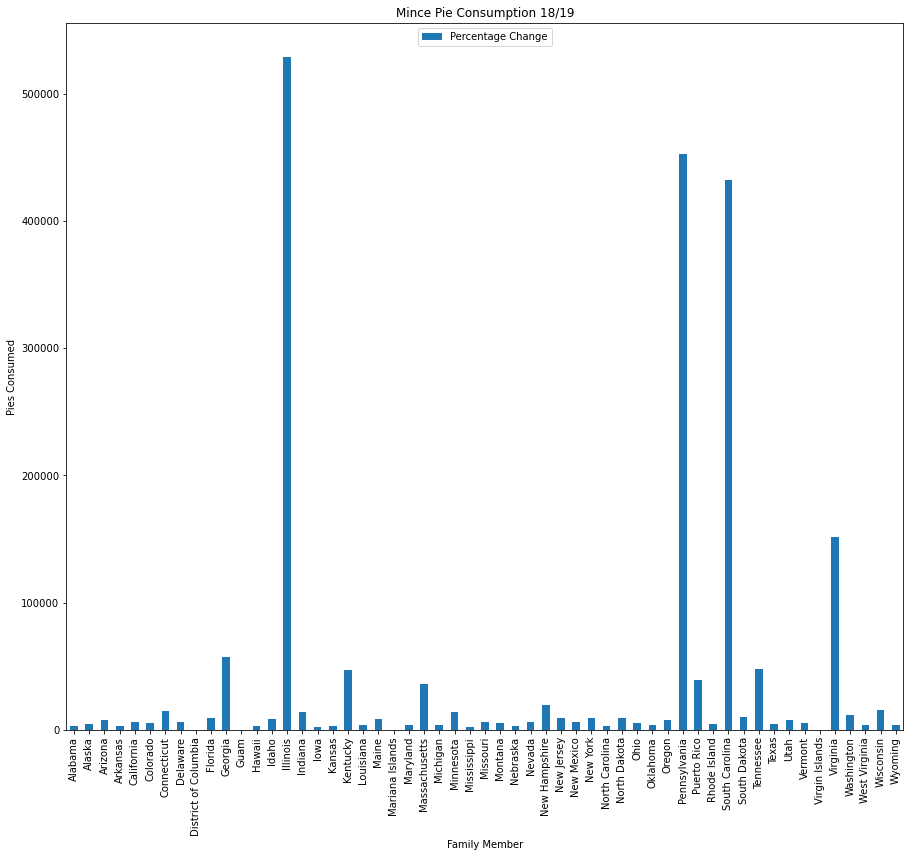

In [152]:
#Making a bar chart to visualise the data easier

#Code from https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
totals_df_ind.reset_index().plot(
    x="state", y=["Percentage Change"], kind="bar", figsize=(15,13)
)
plt.title("Percentage Change of Gun Ownership between 1998/11 and 2017/09")
plt.xlabel("Percentage Change")
plt.ylabel("State")

<h4> Part Two </h4>


Now the data is visualised, we can also see that the top 3 are far greater than any of the other states, 
and the fifth - eleventh are in a similar league, and then the rest are far behind them in terms of percentage change which may
be significant. But again we would need more data to prove this.


<a id="Conclusion"></a>


<h2> Conclusion </h2>

Overall we can see that the general trend of gun ownership is increasing over time, and at an exponential rate. However we can see from the differences in gun ownership between different states that this is likely a few states making most of the difference and so should be careful assuming it's happening equally across all of the U.S.A from this data.

We can see that some factors may lead to more guns per state such as the number of veterans and others such as the rate of people with health insurance has no correlation.

However like all of these types of studies we must remember that correlation does not equal causation. And other limitations in the data such as having some values being absolute values rather than as a percentage of the general population can mean that there is an increase shown which is due to the increase of people rather than gun ownership per capita.

The census dataset had notes in the 'Fact Note' Column that included warnings/disclaimers about the data such as:

'Hispanics may be of any race, so also are included in applicable race categories' and  'Suppressed to avoid disclosure of confidential information' which can lead to bias when interpreting. We also have a difficulty interperating percentage increases for those with very small numbers to begin with.

Many columns in the gun-data had nulls in (so we dropped the columns), affecting the over analysis, arguably giving incomplete data.

Finally we are working with Sample Data which itself is never a perfect representation of the populution as a whole - and there has been no statistical analysis to confirm how representative it is, so is therefore another limitation.

Therefore we must be very wary of drawing broader conclusions from this alone. Further analysis (and more data) is needed to overcome the limiations. Thank you.